# Network Intrusion Detection system
## Introduction
The dataaset is about the network connections related to cyber attacks and normal connections. The raw network packets of the UNSW-NB 15 dataset was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours.
## Phase 1: Loading the dataset
The dataset is loaded for preprocessing and essential insights about the dataset is shown.

 ---

In [1]:
import pandas as pd
df_train = pd.read_csv("UNSW_NB15_training-set.csv")

# Display the columns of the DataFrame
print(df_train.columns)

# Display the first few rows of the DataFrame
df_train.head()

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


## Columns
As we can see the column names are {id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object'}
### Explanation
The most crucial column for me to identify an attack is the **`label`** column.

* **`label`**: This is my **primary target variable**.
    * Typically, a `label = 0` means the network flow is **Normal** (benign traffic).
    * A `label = 1` means the network flow is an **Attack**.

The `attack_cat` column gives me more specific details:

* **`attack_cat`**: This column specifies the **category of the attack** if the `label` is 1. If `label` is 0, this column usually has a 'Normal' value or is empty.
    * Examples of attack categories I might see here include 'DoS' (Denial of Service), 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Backdoors', 'Worms', 'Analysis', and more.
    * I can use `attack_cat` if I want to build a multi-class classification model that not only detects an attack but also classifies its specific type. For my first project, sticking to binary classification (`label` 0 or 1) is a great starting point for me.

---

#### A Glimpse at My Other Columns (Features):

These are the features my model will learn from to predict the `label`:

* **`id`**: This is just a unique identifier for each record. I generally **ignore this column** when I train my model, as it doesn't offer any predictive power.
* **`dur` (Duration)**: This tells me the total duration of the connection in seconds. I've found that longer durations can sometimes indicate certain types of attacks or long-running legitimate sessions.
* **`proto` (Protocol)**: This is a **categorical feature** indicating the protocol used in the connection (e.g., 'tcp', 'udp', 'icmp').
* **`service`**: This is another **categorical feature** that shows the service used (e.g., '-', 'ftp', 'http', 'dns', 'ssh'). A '-' often means no specific service was identified.
* **`state`**: This **categorical feature** describes the state of the connection (e.g., 'FIN', 'INT', 'CON', 'REQ'), often indicating the TCP connection state.
* **`spkts` (Source Packets)**: This is the number of packets sent by the source to the destination.
* **`dpkts` (Destination Packets)**: This is the number of packets sent by the destination to the source.
* **`sbytes` (Source Bytes)**: This tells me the number of bytes sent by the source to the destination.
* **`dbytes` (Destination Bytes)**: This is the number of bytes sent by the destination to the source.
* **`rate`**: This is the number of packets per second. I've learned that high rates can be indicators of scans or DoS attacks.
* **`ct_dst_sport_ltm` (Connection Count Destination Source Port Last Ten Minutes)**: This feature counts the number of connections to the same destination spot over the last 100 connections. These `ct_` (connection count) features are crucial for me to detect scanning and worm activities.
* **`ct_dst_src_ltm` (Connection Count Destination Source Last Ten Minutes)**: This counts the number of connections of the same destination and source address pair over the last 100 connections.
* **`is_ftp_login`**: A binary feature (0 or 1) that tells me if a successful FTP login happened.
* **`ct_ftp_cmd`**: This counts the number of FTP commands.
* **`ct_flw_http_mthd`**: This feature counts the number of HTTP methods (e.g., GET, POST) within a flow.
* **`ct_src_ltm`**: This counts the number of connections having the same source address in the last 100 connections.
* **`ct_srv_dst`**: This counts the number of connections to the same service and destination address in the last 100 connections.
* **`is_sm_ips_ports`**: This is a binary feature (0 or 1) indicating if source and destination IPs are the same and source and destination ports are the same. I've noted this can often flag specific types of network anomalies or loopback issues.
---

## Phase 2: Data Cleanup & Transformation
### Cleaning
- Usually analyses the missing values and either substitute or remove the row.
- Numerical null values can be usually substituted by average mean or a specific number.
- String values can be removed.
- And numerical columns are sometimes removed too according the specific dataset.
- All of these depends upon the dataset and the missing data.

Starting by checking both my training and testing datasets, for any NaN (Not a Number) values.

In [2]:
# Checking for missing values in the training set
missing_count = df_train.isnull().sum()
missing_columns = missing_count[missing_count > 0]
print("Columns with missing values in the training set:")
print(missing_columns)

# Checking for missing values in the test set
df_test = pd.read_csv("UNSW_NB15_testing-set.csv")
missing_count = df_test.isnull().sum()
missing_columns = missing_count[missing_count > 0]
print("Columns with missing values in the test set:")
print(missing_columns)

Columns with missing values in the training set:
Series([], dtype: int64)
Columns with missing values in the test set:
Series([], dtype: int64)


### Explanation
We are actually taking the count of null values in each row and saving it into a dictionary like data structure with column names as id and the count as data. We are then only printing the columns with positive and >0 counts. But the dictionary was empty and returned no names and the int 64 is showing the data it expected was integer 64 bit since those were counts...

---

### Encoding Categorical Features
Now that I've handled any missing pieces, my next big task is to convert all those text-based, categorical features into numbers.

The main categorical features I've identified are proto, service, and state. For these, I'll use a technique called One-Hot Encoding.
#### One-Hot encoding
Imagine I have a column proto with values 'tcp', 'udp', 'icmp'(actually we havea similar column with similar values). One-Hot Encoding will transform this into new columns:

    proto_tcp (1 if TCP, 0 otherwise)

    proto_udp (1 if UDP, 0 otherwise)

    proto_icmp (1 if ICMP, 0 otherwise)

---

In [3]:
# Checking for columns with object type or string type datas to encode.
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

We can see that only 4 columns, 'proto', 'service', 'state' & 'attack_cat' is the object columns. Here 'attack_cat' is kind of a target column but but considering it as a target makes the model multiclass. So for the simplification of model and to reduce complexitywe are removing colums 'attack_cat' and 'id'. 

---

In [4]:
# Removing 'attack_cat' and 'id' columns from both training and test sets
df_test_processed = df_test.drop(columns=['attack_cat' , 'id'], errors='ignore')
df_train_processed = df_train.drop(columns=['attack_cat' , 'id'], errors='ignore')

# We're focusing on features for now. If we notice attack_cat to encode, we can encode it later.
categorical_cols = ['proto', 'service', 'state']

y_test = df_test['label']
y_train = df_train['label']

# Dropping the label column from the training and test sets
x_test = df_test_processed.drop(columns=['label'])
x_train = df_train_processed.drop(columns=['label'])

# Concatenating the training and test sets for encoding all possible categorical variables
features = pd.concat([x_train, x_test], ignore_index=True)
features_encd = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

#Splitting the encoded features back into training and test sets.
x_train_encd = features_encd.iloc[:len(x_train)]
x_test_encd = features_encd.iloc[len(x_train):]

print(x_train_encd.shape)
print(x_test_encd.shape)

x_train_encd.head()

(82332, 193)
(175341, 193)


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,False,False,False,False,True,False,False,False,False,False


### Explanation
Since each categorical value of the columns became seperate columns with values 1 or 0 (True/False), the total number of columns increased fromm *45* to *193*.

---

In [5]:
# Importing all essential libraries
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Scalinng
Many feature selection algorithms (like SelectKBest when using statistical tests like f_classif, etc.) rely on measures of distance or variance to determine feature importance. So values way beyond a limit (outliers) are needed to be treated.

---

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

to_scale_train = x_train_encd.select_dtypes(include=[np.number]).columns

scaler.fit(x_train_encd[to_scale_train])

x_train_scaled = x_train_encd.copy()
x_test_scaled = x_test_encd.copy()

x_train_scaled[to_scale_train] = scaler.transform(x_train_encd[to_scale_train])
x_test_scaled[to_scale_train] = scaler.transform(x_test_encd[to_scale_train])

# We are only taking columns with more than 2 unique values for numerical features. Becausse something with only 2 unique values is most probably a yes or no type of data. Usually cant be used for feature selection.
numerical_cols = [col for col in x_train_scaled.columns if x_train_scaled[col].nunique() > 2]
for col in numerical_cols:
    Q1 = x_train_scaled[col].quantile(0.25)
    Q3 = x_train_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    x_train_scaled[col] = np.clip(x_train_scaled[col], lower_bound, upper_bound)
    x_test_scaled[col] = np.clip(x_test_scaled[col], lower_bound, upper_bound)
print("Data is ready for feature selection.")

Data is ready for feature selection.


### Explanation
We are using Z-Score method or the Standardisation method to scale down the neumerical values and reduce the skewness by arranging them around zero for better perfomance. Standardisation scales the data with mean 0 and a deviation of the data from the mean. Values can be positive or negative.
##### IQR
IQR method is used later to confirm no outliers exist. Q1,Q2,Q3 are found from the data. Q2 is the median and Q1and Q3 are 25thand 75th percentile of the data. We are not removing the rows with out lying values but replacing them with the minimun value if the outlier is below minmum and replace with the maximum value if the outlier is above the maximum value. np.clip() is used for this process.

---

## Phase 3: Feature Selection
After removing null/NaN rows, columns with no features like id, attack_cat and our target column label, our dataset is processed to identify numerical columns(eg. rate, time, duration, etc.). Then outliers are removed using IQR method.

We are having a total of 193 columns which is pretty huge. So to reduce the processing complexity, we have to select a 50 most useful features and then only proceed to the EDA. We can later increase the number of features by analysing perfomance of the model

---

In [7]:
# Feature selection using SelectKBest
# Number of features to select
n = 50
selector = SelectKBest(score_func=f_classif, k=n)
# Fit the selector to the training data (feattures and target 'label)
selector.fit(x_train_scaled, y_train)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
# Get the selected feature names
selected_features = x_train_scaled.columns[selected_indices]

print(f"Selected {len(selected_features)} features out of {len(x_train_scaled.columns)} total features.")
print("Selected features:")
print(selected_features.tolist())

# Create a new DataFrame with the selected features
x_train_selected = x_train_scaled[selected_features]
x_test_selected = x_test_scaled[selected_features]

Selected 50 features out of 193 total features.
Selected features:
['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_arp', 'proto_ospf', 'proto_sctp', 'proto_tcp', 'proto_udp', 'proto_unas', 'service_dns', 'service_ftp-data', 'service_pop3', 'service_smtp', 'service_ssh', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ']


/home/penguin/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 75 129 185 188 191 192] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/penguin/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## Phase 4: EDA
Now we have done all the preprocessingand selected the features. Now we can plot graphs, figures, charts, etc. to findout the patterns and corelations.

---

/tmp/ipykernel_708126/3344625578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


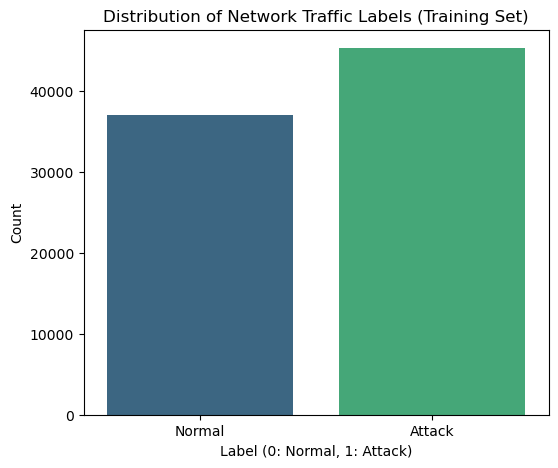

In [9]:
# Visualizing the distribution of labels in the training set
plt.figure(figsize=(6, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Network Traffic Labels (Training Set)')
plt.xlabel('Label (0: Normal, 1: Attack)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.show()

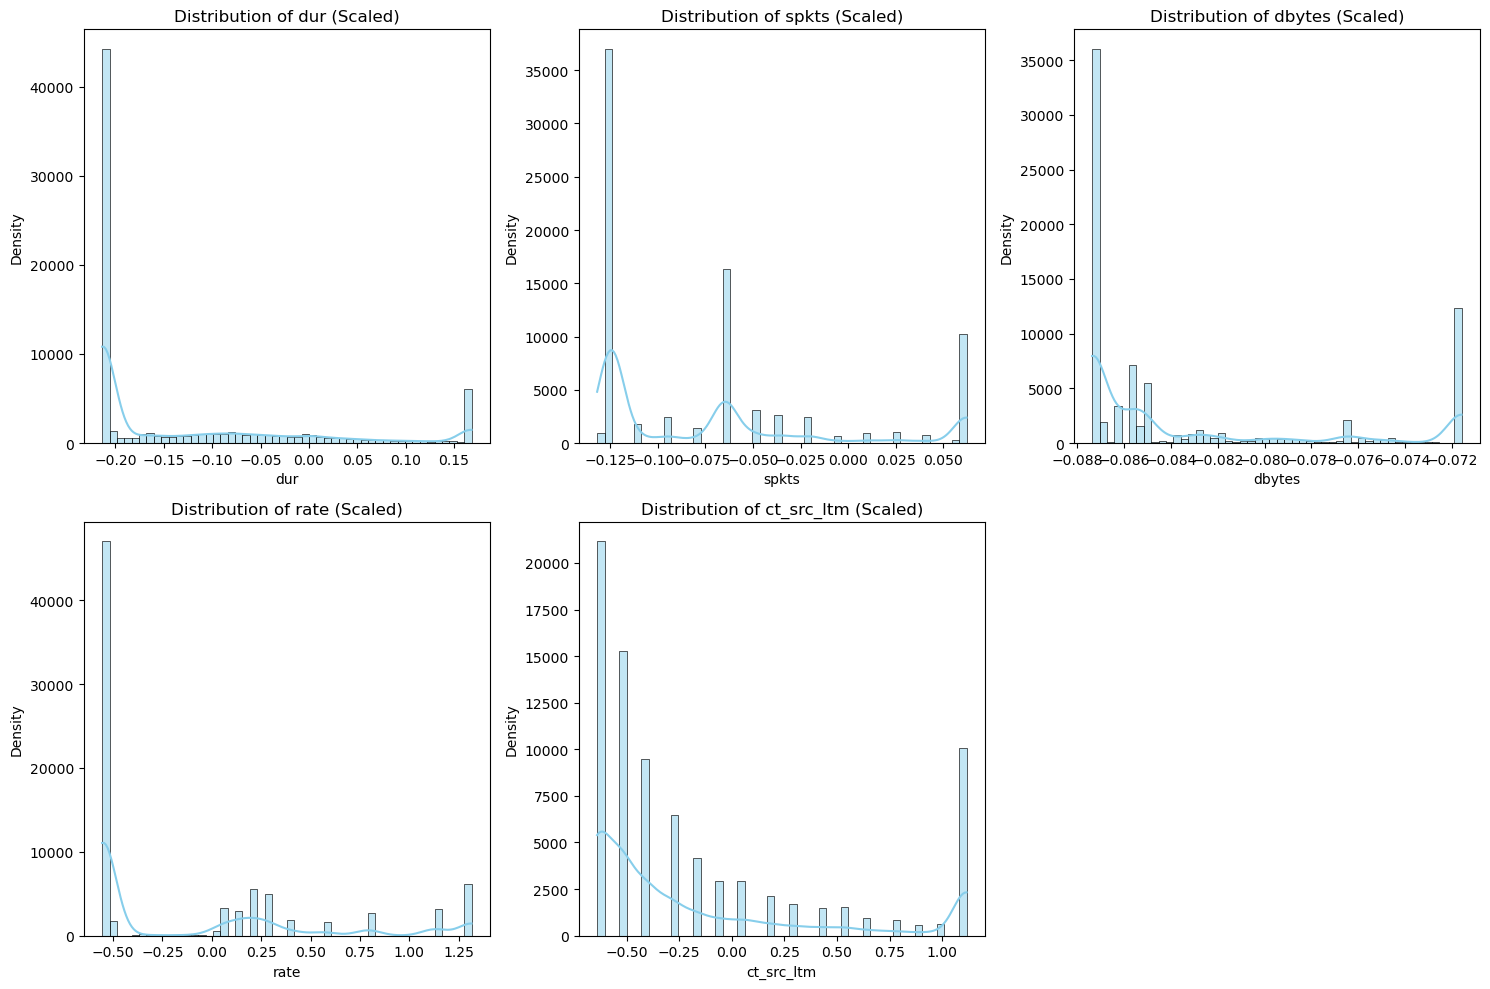

In [12]:
# A simple histogram/KDE plot to visualise distribution of some of the neumerical columns.
selected_numerical_features = ['dur', 'spkts', 'dbytes', 'rate', 'ct_src_ltm']
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(x_train_scaled[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col} (Scaled)')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

### Explanation
- Here the x-axis is showing range of values from respective neumerical columns and the y axis about the density, which means the probability of seeing one in this range.
- We can easily understand the density of contents within each range from this graph.
- From the KDE line we can see that our data isnt verymuch skewed, since we removed the skewness.
- From the graph we get many major insights like
    - majority of the connections were for low duration.
    - majority of connections only sent very less bytes.
    - majority of connections shared a very low rate of datas.
    - majority of the devices or ip addresses were only connected for few times in last 100s. But significantly large amount of addresses connected for very many times in last 100s. This might be clearly pointing to a network attack.

---

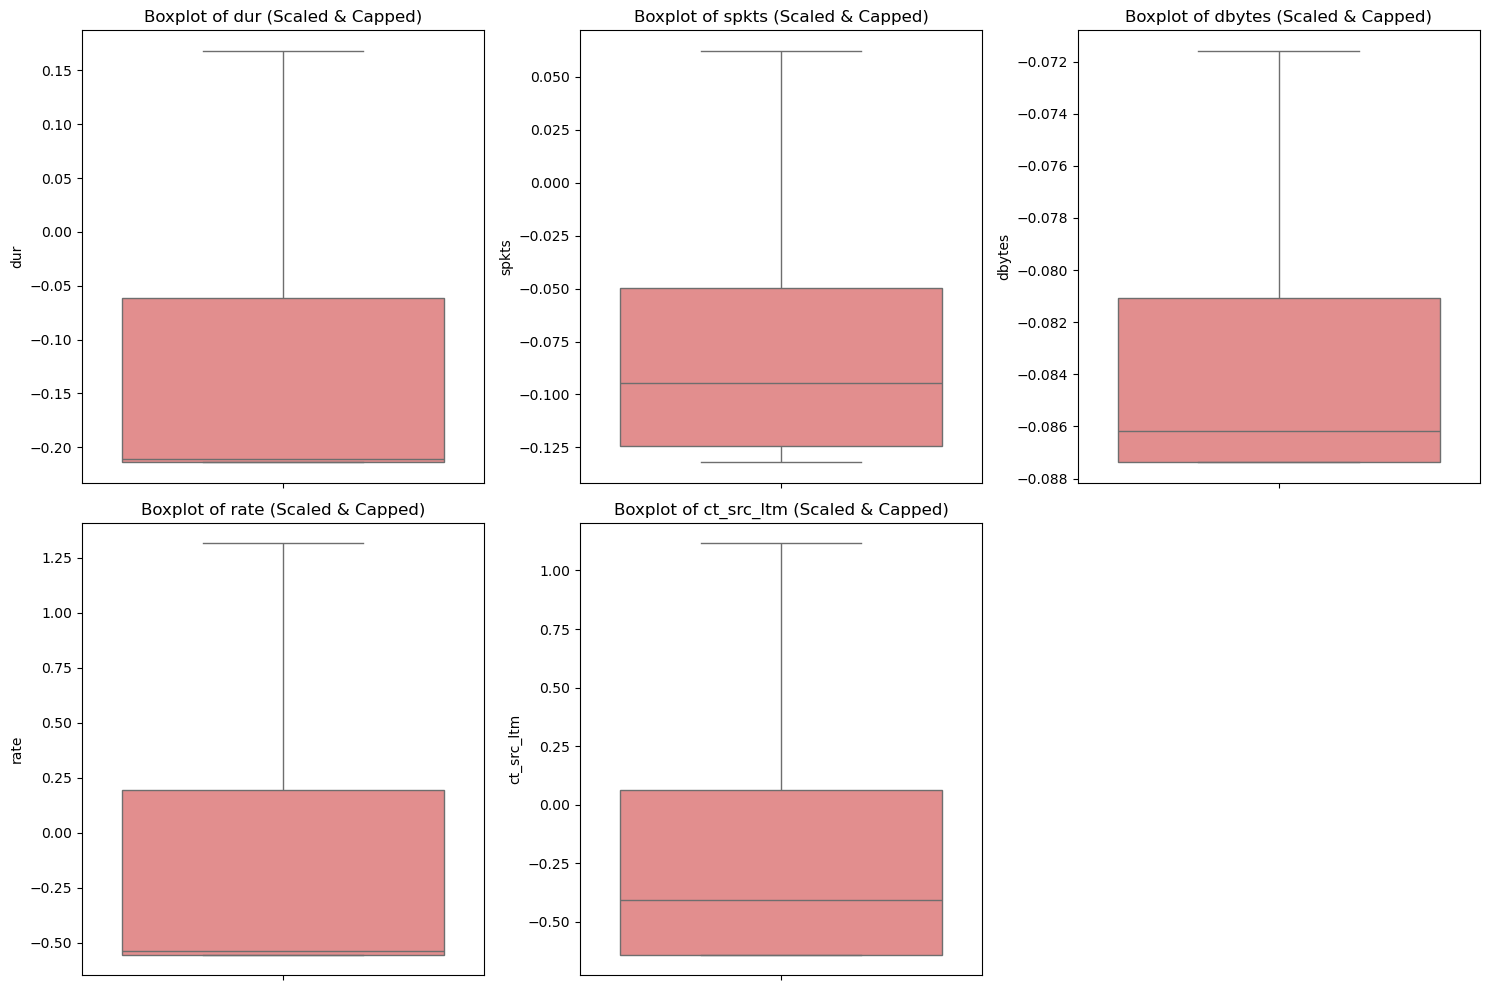

In [14]:
# To see the effect of capping, we are gonna use boxplots.
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=x_train_scaled[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (Scaled & Capped)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Explanation
We can see that almost every columns contain data with a Q1 very closer to the Q2 and Q3 compared to the Q4. The maximum values are pretty high and all the data seems to fit low below in each of the 5 diagrams. Since we have already removed the otliers, the result contains only iseful data.

---


--- Top 20 Features Correlated with 'label' (Attack/Normal) ---
label               1.000000
state_INT           0.538576
ct_dst_sport_ltm    0.513160
sttl                0.504159
ct_state_ttl        0.448469
rate                0.445154
sload               0.411680
ct_src_dport_ltm    0.390871
service_dns         0.363961
ct_srv_dst          0.286777
ct_srv_src          0.283702
ct_src_ltm          0.266959
proto_udp           0.261057
ct_dst_src_ltm      0.257909
ct_dst_ltm          0.230607
proto_unas          0.190788
proto_ospf          0.071919
service_pop3        0.064924
proto_sctp          0.056786
service_smtp        0.032421
Name: label, dtype: float64

--- Bottom 20 Features Correlated with 'label' (Attack/Normal) ---
dloss               -0.321784
sbytes              -0.332620
sloss               -0.344509
dpkts               -0.347123
dwin                -0.369257
dmean               -0.374210
swin                -0.414504
proto_tcp           -0.414626
dload              

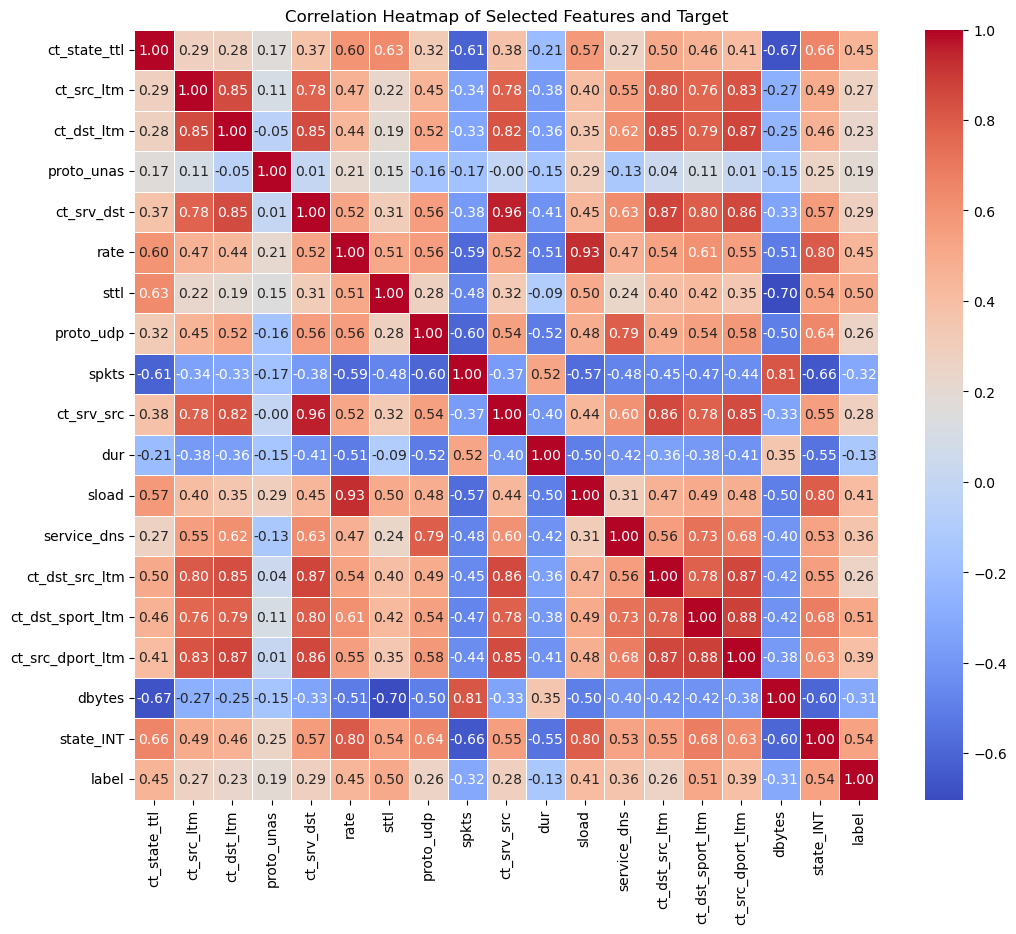

In [16]:
# Heatmap
#Lets copy the scaled features to a new dataset and add the label column(our target) to it for correlation analysis.
train_data_for_corr = x_train_scaled.copy()
train_data_for_corr['label'] = y_train

# Now we can calculate the correlation matrix with the label column.
# The .corr() fumction makes a matrix of each features selected and their correlation with each other in a scale of -1 to 1.
# 1 means perfect positive correlation, -1 means perfect negative correlation, and 0 means no correlation.
# With respect to the labbel column, positive value means its an attack and negative value means its just a normal connection.
correlations_with_label = train_data_for_corr.corr()['label'].sort_values(ascending=False)

# Top 20 features will be positive and bottom 20 features will be negative.
print("\n--- Top 20 Features Correlated with 'label' (Attack/Normal) ---")
print(correlations_with_label.head(20))
print("\n--- Bottom 20 Features Correlated with 'label' (Attack/Normal) ---")
print(correlations_with_label.tail(20))

top_correlated_features = correlations_with_label.index[1:16].tolist()
features_for_heatmap = list(set(selected_numerical_features + top_correlated_features))
if 'label' not in features_for_heatmap:
    features_for_heatmap.append('label')

# Just making sure that we got enough features, with the if else statement.
if len(features_for_heatmap) > 1:
    plt.figure(figsize=(12, 10))
    sns.heatmap(train_data_for_corr[features_for_heatmap].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Selected Features and Target')
    plt.show()
else:
    print("\nNot enough features selected to generate a meaningful correlation heatmap.")

### Explanation
We have a correlation heatmap on how the selected features effect each other. The blue shaded ones are inversely propotional and the rer shaded ones are directly propotional.

Then we have also printed the relation betweeen top 20 features and bottom 20 features with respect to the label column, which means how much does a feature affect the connection to be an attack or not.

---

## Phase 5: Model Training
#### Logical regression
Mathematically finding a straight line through a binary problem. It could be plane in higher dimentions.
#### Decision tree
This model builds a series of yes/no questions (like a flowchart) based on features to arrive at a decision. It's interpretable but can get complex.
#### Random forrest
A collection of decision trees where each tree votes an outcome. More accureate than the decision tree.

---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


print("\nTraining Logistic Regression Model...")
lr_model = LogisticRegression(random_state=42, solver='liblinear', n_jobs=-1, max_iter=1000)
lr_model.fit(x_train_selected, y_train)
# Predictions
y_pred_lr = lr_model.predict(x_test_selected)
# Evaluation
print("--- Logistic Regression Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


print("\nTraining Random Forest Classifier Model...")
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
rf_model.fit(x_train_selected, y_train)
# Predictions
y_pred_rf = rf_model.predict(x_test_selected)
# Evaluation
print("\n--- Random Forest Classifier Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


print("\nTraining Decision Tree Classifier Model...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_selected, y_train)
# Predictions
y_pred_dt = dt_model.predict(x_test_selected)
# Evaluation
print("\n--- Decision Tree Classifier Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-Score:", f1_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Training Logistic Regression Model...


/home/penguin/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


--- Logistic Regression Performance ---
Accuracy: 0.8785965632681461
Precision: 0.9834533083522335
Recall: 0.8356893272219941
F1-Score: 0.9035700857527259

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.84     56000
           1       0.98      0.84      0.90    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.90      0.87    175341
weighted avg       0.90      0.88      0.88    175341


Confusion Matrix:
 [[54322  1678]
 [19609 99732]]

Training Random Forest Classifier Model...

--- Random Forest Classifier Performance ---
Accuracy: 0.8976850822112341
Precision: 0.9898078465090667
Recall: 0.8585146764314024
F1-Score: 0.9194981422648215

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86     56000
           1       0.99      0.86      0.92    119341

    accuracy                           0.90    1

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

print("\nEvaluating Logistic Regression ROC AUC...")
y_pred_proba_lr = lr_model.predict_proba(x_test_selected)[:, 1]
# Calculating ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
# Calculating AUC score
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression AUC: {auc_lr:.4f}")

print("\nEvaluating Random Forest Classifier ROC AUC...")
y_pred_proba_rf = rf_model.predict_proba(x_test_selected)[:, 1]
# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
# Calculate AUC score
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest AUC: {auc_rf:.4f}")

print("\nEvaluating Decision Tree Classifier ROC AUC...")
y_pred_proba_dt = dt_model.predict_proba(x_test_selected)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"Decision Tree AUC: {auc_dt:.4f}")

print("\nROC AUC analysis complete for all three models!")


Evaluating Logistic Regression ROC AUC...
Logistic Regression AUC: 0.9789

Evaluating Random Forest Classifier ROC AUC...
Random Forest AUC: 0.9819

Evaluating Decision Tree Classifier ROC AUC...
Decision Tree AUC: 0.9113

ROC AUC analysis complete for all three models!


In [19]:
from sklearn.model_selection import GridSearchCV

print("Starting GridSearchCV for Random Forest. This may take some time...")

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=-1,
                              verbose=2)

grid_search_rf.fit(x_train_selected, y_train)
print("\nGrid Search Complete!")

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"\nBest Hyperparameters for Random Forest: {best_params_rf}")
print(f"Best ROC AUC Score with these parameters (from CV): {best_score_rf:.4f}")
best_rf_model = grid_search_rf.best_estimator_

print("\n--- Evaluating the Best Random Forest Model on the Test Set ---")
y_pred_best_rf = best_rf_model.predict(x_test_selected)
y_pred_proba_best_rf = best_rf_model.predict_proba(x_test_selected)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf))
print("Recall:", recall_score(y_test, y_pred_best_rf))
print("F1-Score:", f1_score(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

auc_best_rf = roc_auc_score(y_test, y_pred_proba_best_rf)
print(f"ROC AUC on Test Set (Best RF): {auc_best_rf:.4f}")

print("\nRandom Forest Tuning complete!")


--- Phase 13: Hyperparameter Tuning for Random Forest ---
Starting GridSearchCV for Random Forest. This may take some time...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  46.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  48.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  56.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  59.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 

In [21]:
import joblib
import os

print("\nSaving and Loading the Best Random Forest Model")

# Path to the folder to save the model. The folder should must exist.
model_dir = 'networkFilter'

# Set up the file path
model_file_path = os.path.join(model_dir, 'my_tuned_rf.joblib')

# Saivng the model
joblib.dump(best_rf_model, model_file_path)
print(f"Model saved to: {model_file_path}")

# Loading the model back just to verify
loaded_model = joblib.load(model_file_path)
print(f"🚀 Model loaded back from: {model_file_path}")

print("\nSimplified model saving and loading complete!")


Saving and Loading the Best Random Forest Model
Model saved to: networkFilter/my_tuned_rf.joblib
🚀 Model loaded back from: networkFilter/my_tuned_rf.joblib

Simplified model saving and loading complete!
